In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IRIS Dataset

In [43]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df.shape

(150, 5)

In [45]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


In [46]:
print("Species counts:")
print(df["species"].value_counts())

Species counts:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [47]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df[features].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


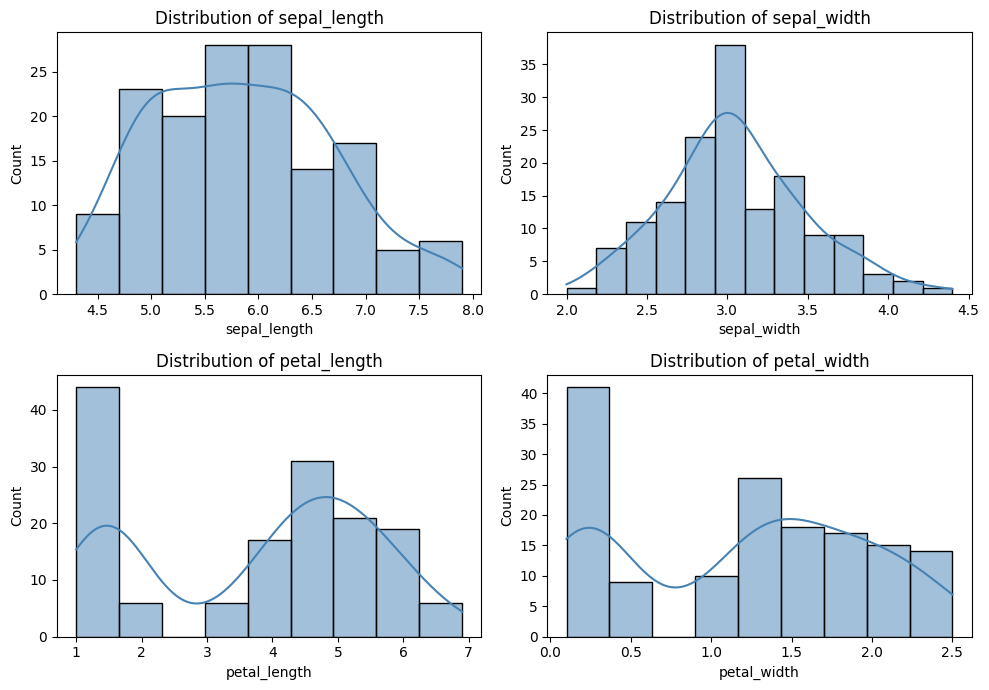

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
for ax, col in zip(axes.ravel(), features):
    sns.histplot(df[col], kde=True, ax=ax, color="steelblue", linewidth=1)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig('iris_histograms.png', format='png')
plt.show()

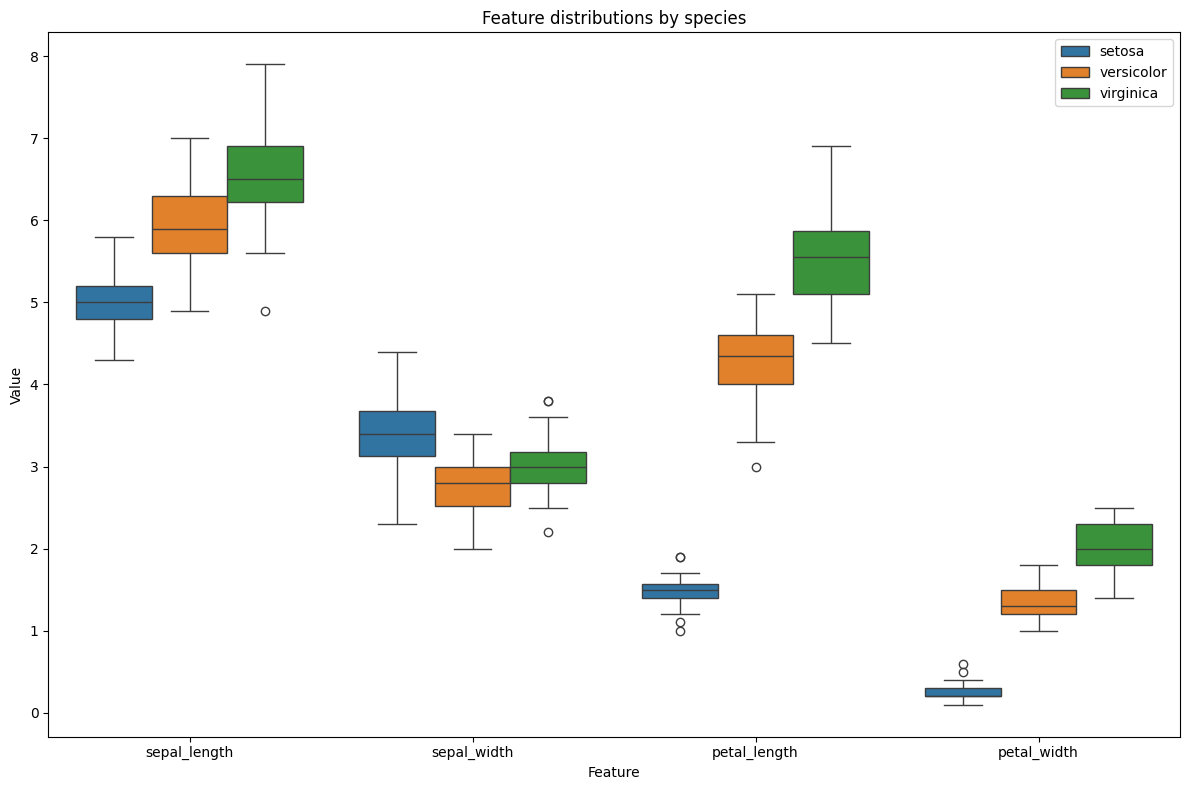

In [49]:
plt.figure(figsize=(12, 8))
melted = df.melt(id_vars="species", value_vars=features, var_name="features", value_name="Value")
sns.boxplot(data=melted, x="features", y="Value", hue="species", linewidth=1)
plt.title("Feature distributions by species")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('iris_boxplots.png', format='png')
plt.show()

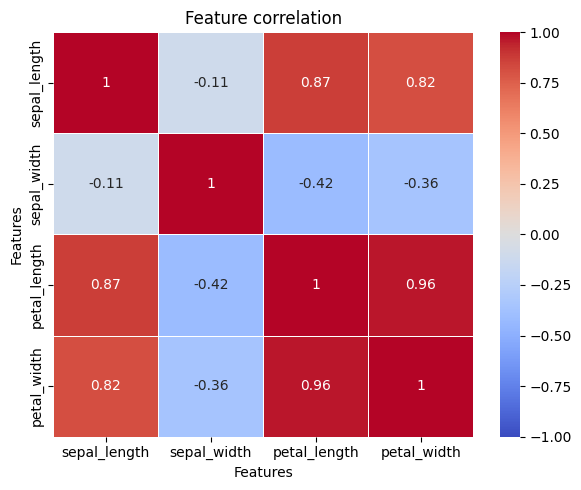

In [50]:
plt.figure(figsize=(6, 5))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Feature correlation")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('iris_heatmap.png', format='png')
plt.show()

# Loan Amount Prediction

In [51]:
df = pd.read_csv("loanAmount.csv")
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [39]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  str    
 1   Name                         30000 non-null  str    
 2   Gender                       29947 non-null  str    
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  str    
 6   Profession                   30000 non-null  str    
 7   Type of Employment           22730 non-null  str    
 8   Location                     30000 non-null  str    
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  str    
 12  Expense Type 2               30000 non-null  str    
 13  Dependents                 

In [52]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


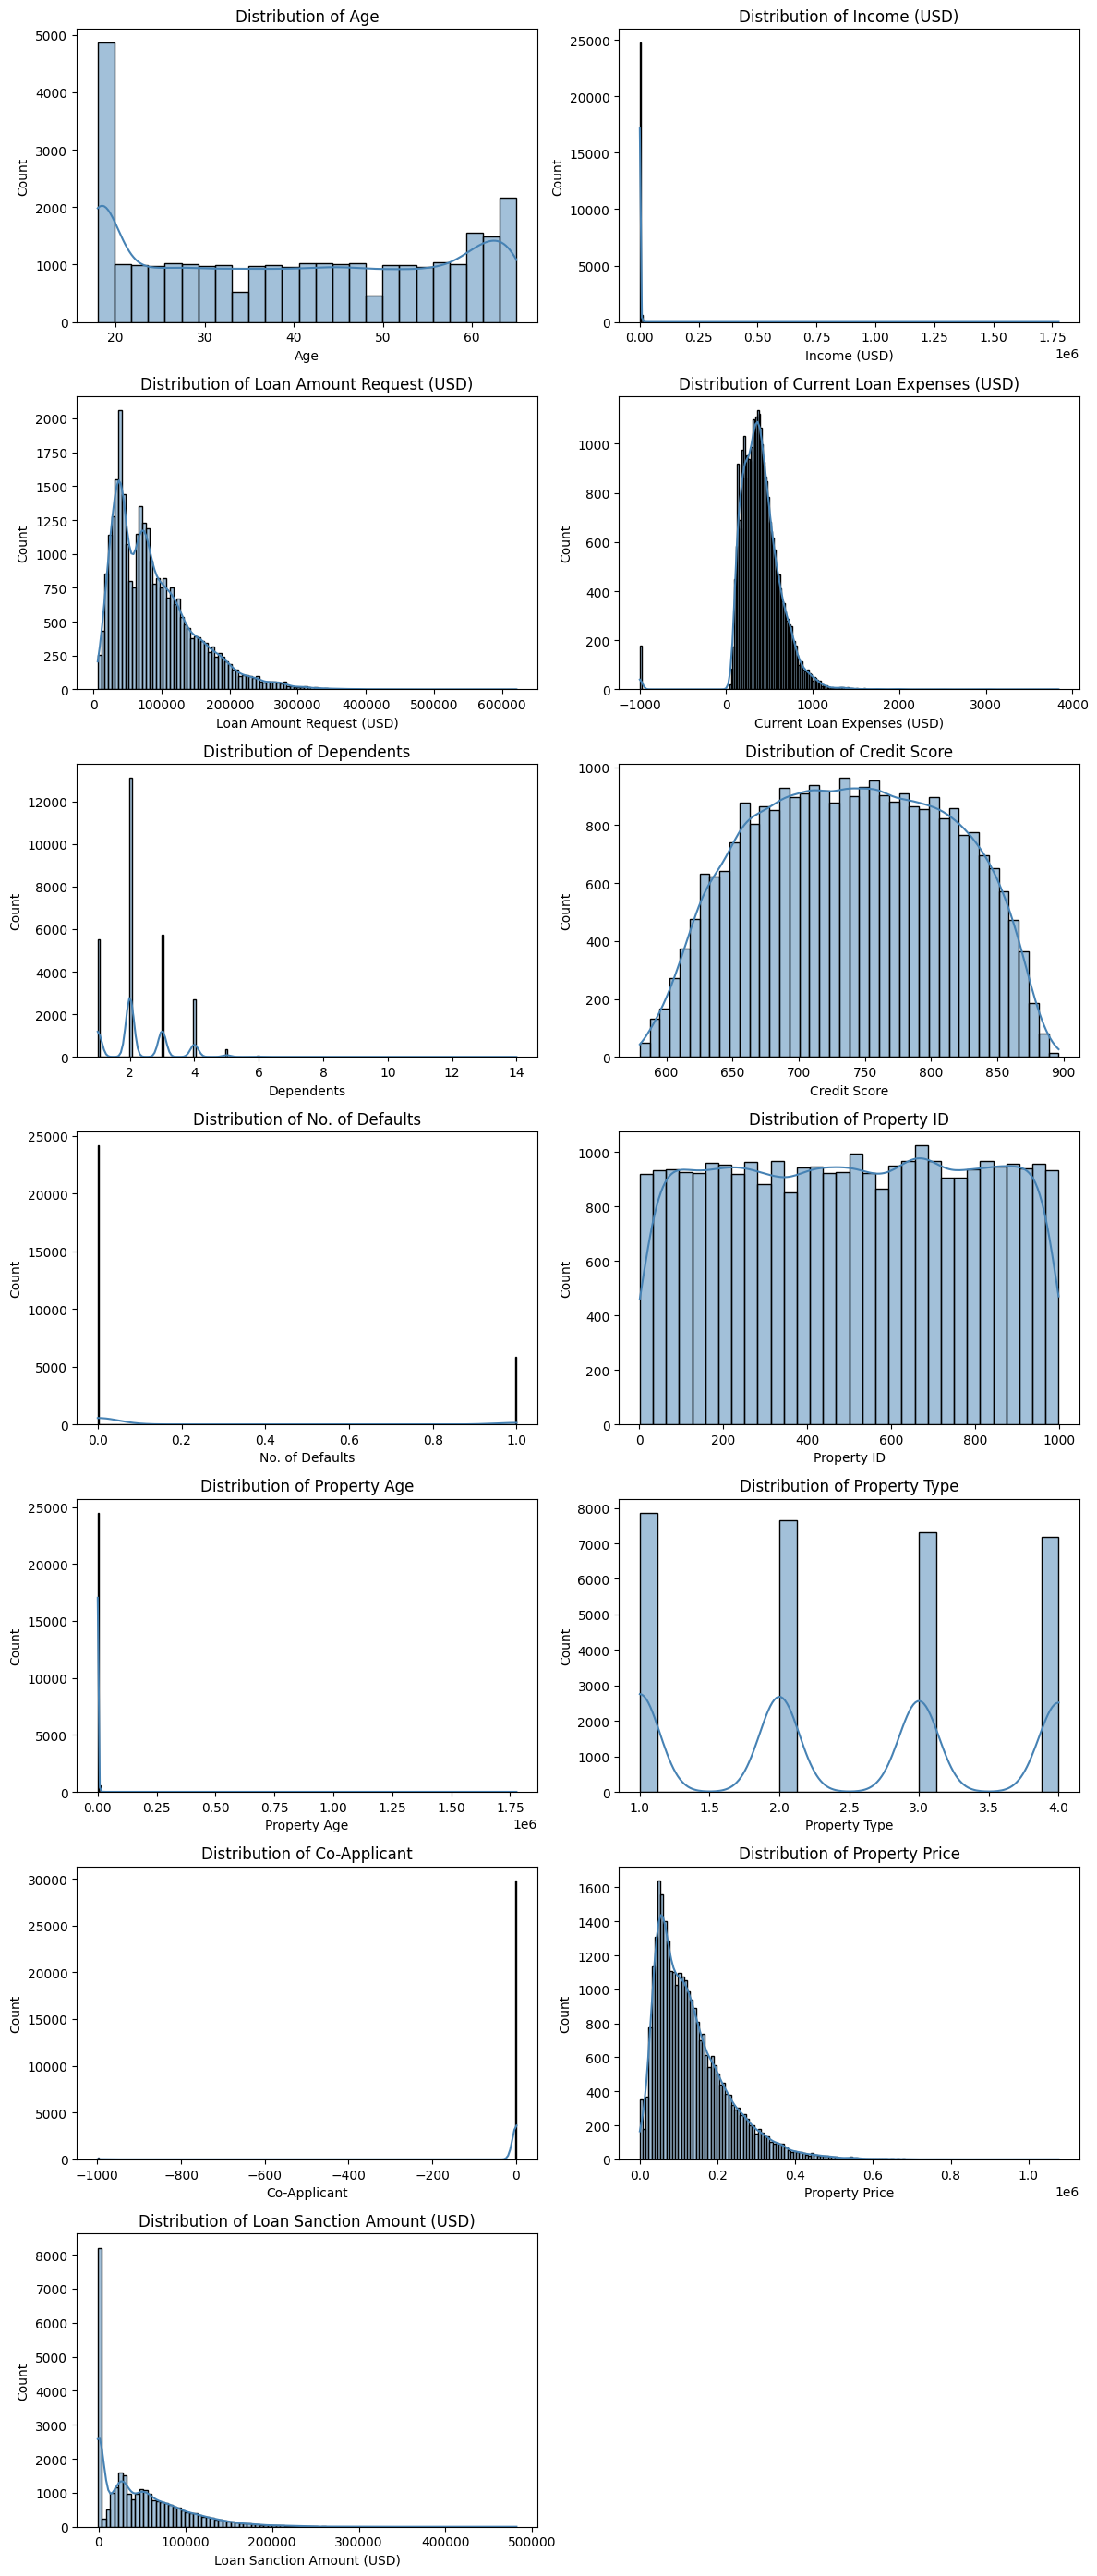

In [53]:
# Distribution plots for numeric features
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
# arrange histograms into a grid (2 columns)
cols = 2
rows = (len(numeric_cols) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axes = axes.ravel() if hasattr(axes, 'ravel') else [axes]
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="steelblue", linewidth=1)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
# hide unused axes
for j in range(i+1, len(axes)):
    try:
        fig.delaxes(axes[j])
    except Exception:
        pass
plt.tight_layout()
plt.savefig('loan_numeric_histograms.png', format='png')
plt.show()

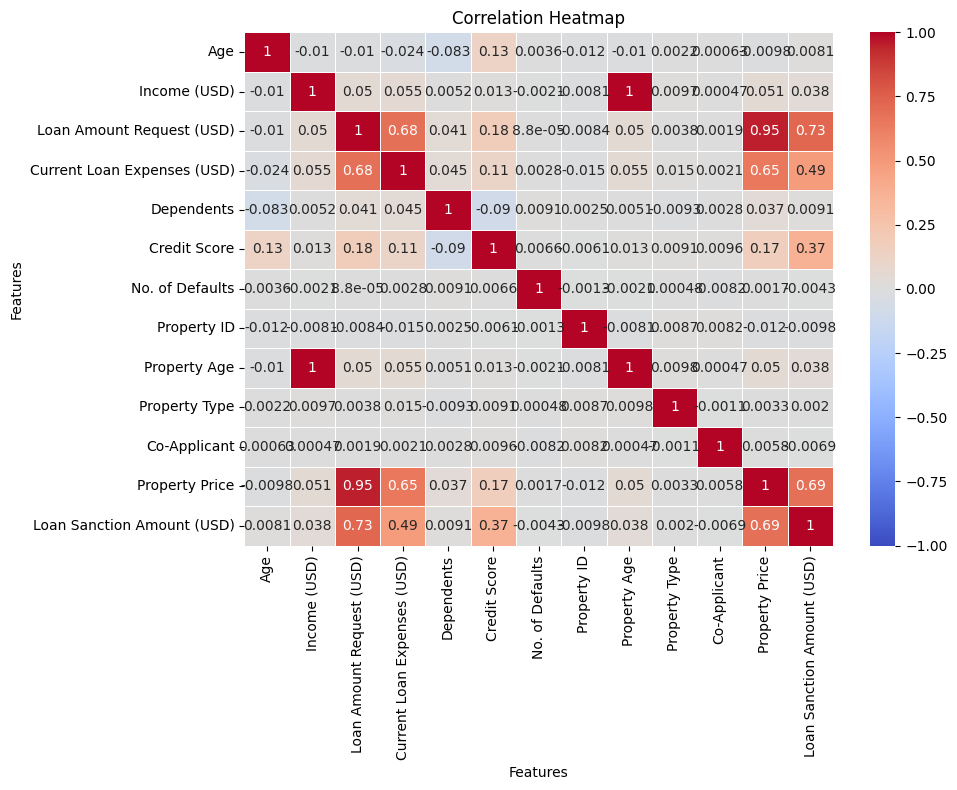

In [54]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('loan_correlation_heatmap.png', format='png')
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include=["object", "string"]).columns
cats = list(categorical_cols)

# plot countplots in 2x2 grids
for i in range(0, len(cats), 4):
    chunk = cats[i:i+4]
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    axes_flat = axes.ravel()

    for j, col in enumerate(chunk):
        sns.countplot(
            data=df,
            x=col,
            hue="Loan_Status" if "Loan_Status" in df.columns else None,
            ax=axes_flat[j]
        )
        axes_flat[j].set_title(f"Counts of {col}")
        axes_flat[j].set_xlabel(col)
        axes_flat[j].set_ylabel("Count")
        axes_flat[j].tick_params(axis='x', rotation=45)

    # hide unused axes
    for k in range(len(chunk), 4):
        fig.delaxes(axes_flat[k])

    plt.tight_layout()
    plt.savefig(f'loan_categorical_{i//4}.png')  # fixed extension
    plt.show()


# Diabetes

In [55]:
df = pd.read_csv("diabetes.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [56]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   str    
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   str    
dtypes: float64(8), int64(4), str(2)
memory usage: 109.5 KB


In [20]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


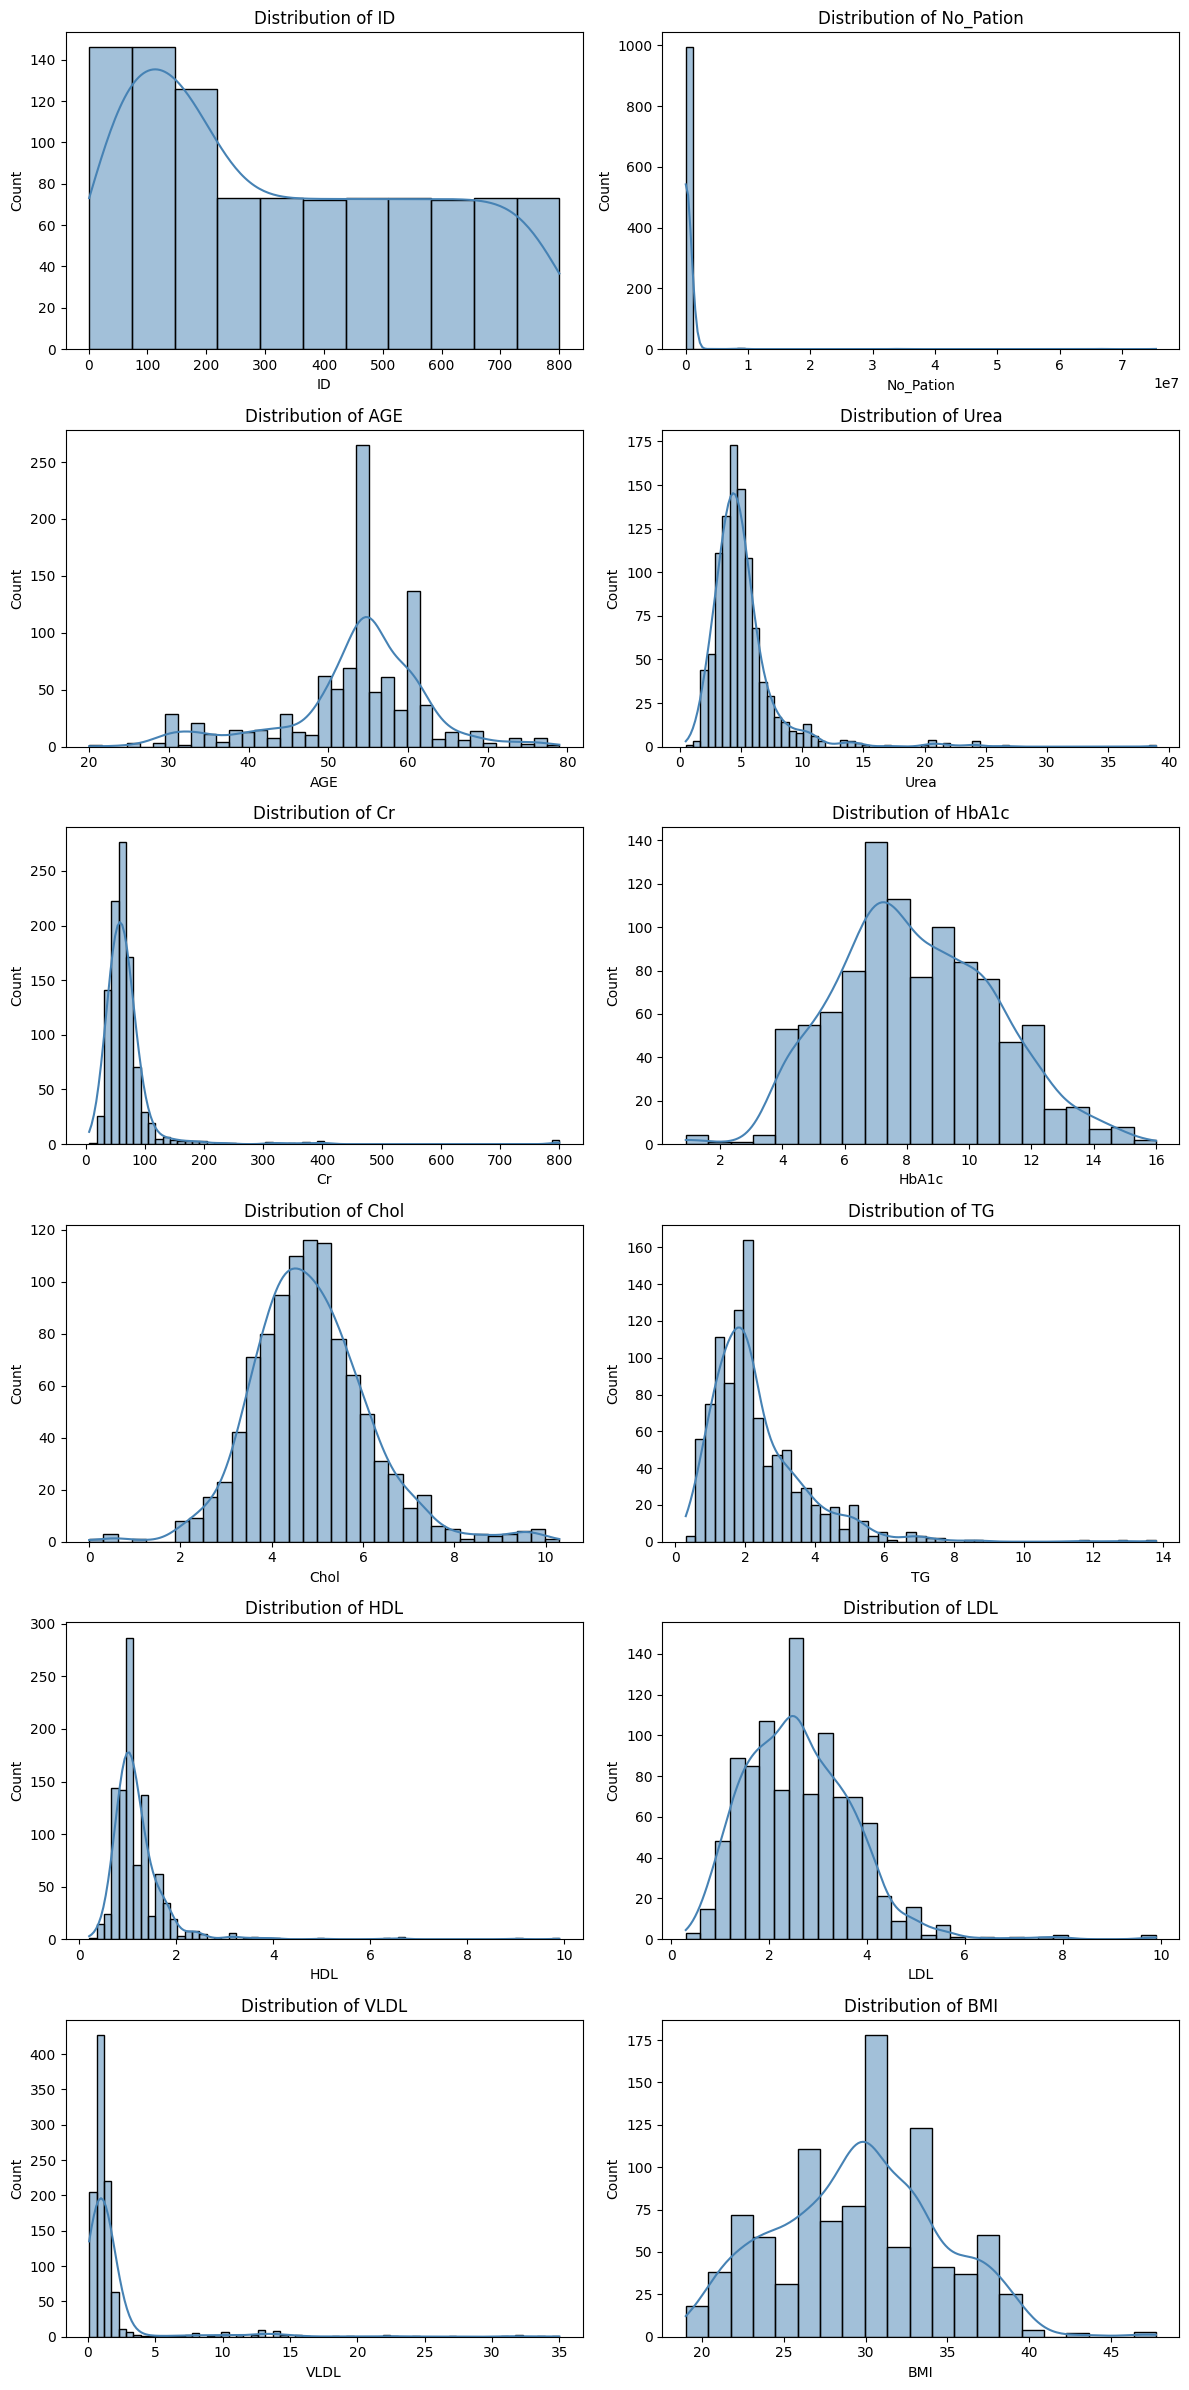

In [57]:
# Numeric feature distributions
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
cols = 2
rows = (len(numeric_cols) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axes = axes.ravel() if hasattr(axes, 'ravel') else [axes]
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="steelblue", linewidth=1)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
for j in range(i+1, len(axes)):
    try:
        fig.delaxes(axes[j])
    except Exception:
        pass
plt.tight_layout()
plt.savefig('diabetes_numeric_histograms.png', format='png')
plt.show()

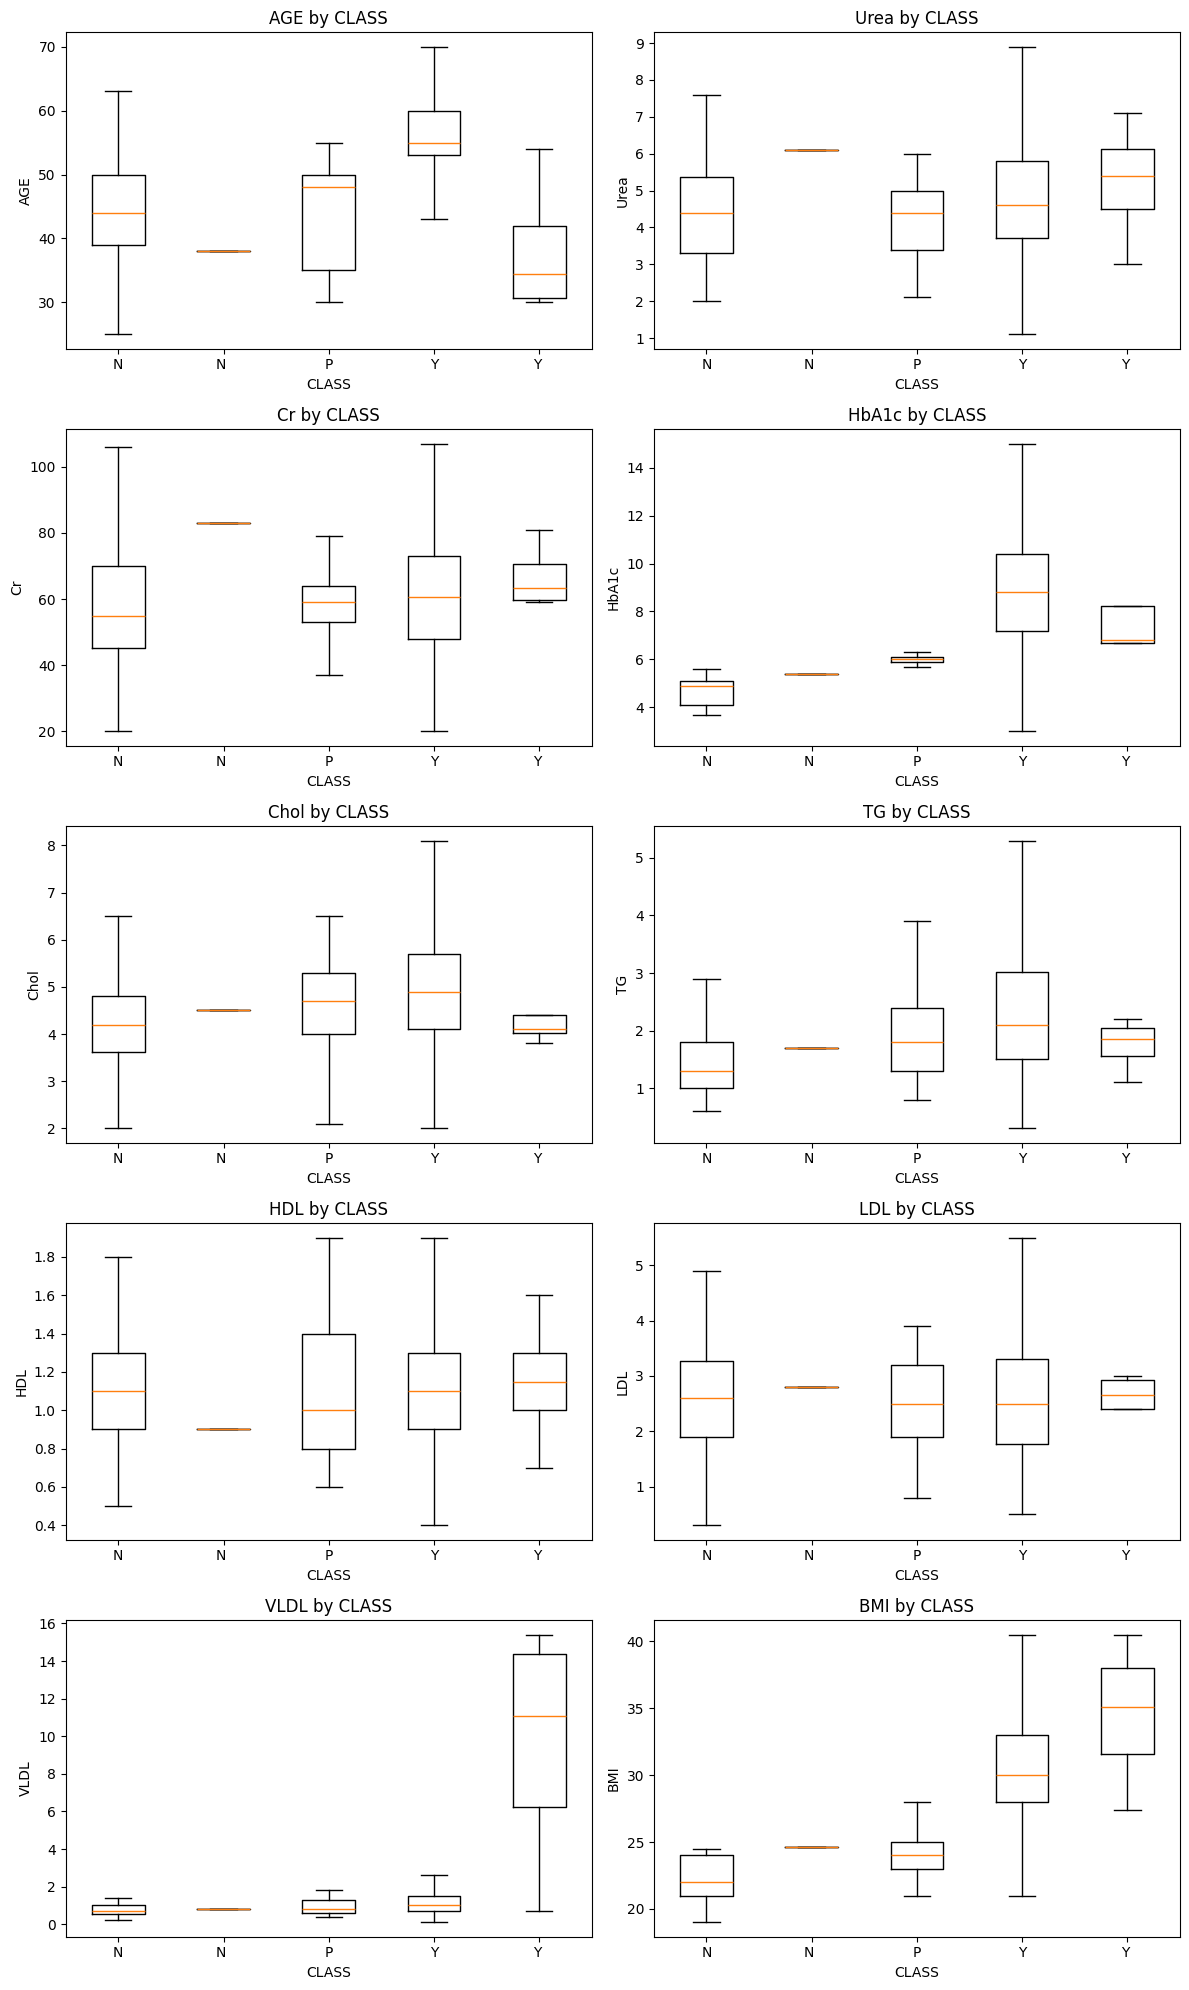

In [61]:
import matplotlib.pyplot as plt

# Numeric columns (exclude IDs)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ["ID", "No_Pation"]]

if "CLASS" in df.columns:
    cols = 2
    rows = (len(numeric_cols) + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axes = axes.ravel()

    # Stable class order
    classes = sorted(df["CLASS"].unique())
    class_groups = [df[df["CLASS"] == c] for c in classes]

    for i, col in enumerate(numeric_cols):
        data = [grp[col].values for grp in class_groups]
        axes[i].boxplot(
            data,
            tick_labels=classes,
            showfliers=False
        )
        axes[i].set_title(f"{col} by CLASS")
        axes[i].set_xlabel("CLASS")
        axes[i].set_ylabel(col)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig("diabetes_boxplot.png",format="png")
    plt.show()


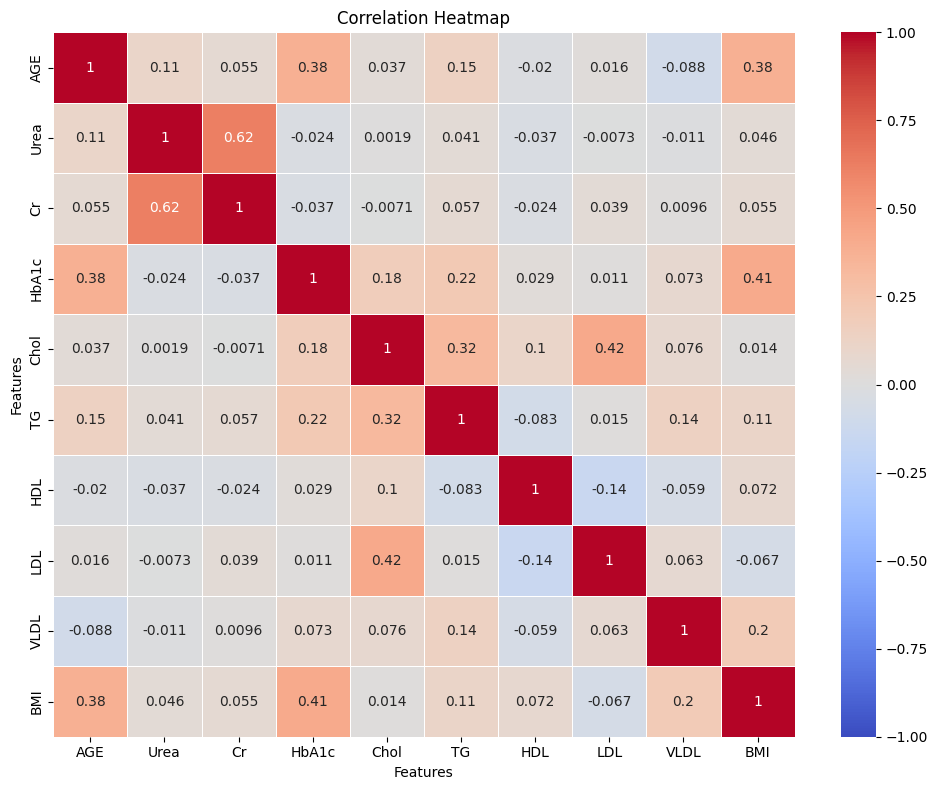

In [59]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('diabetes_correlation_heatmap.png', format='png')
plt.show()

# SPAM EMAIL

In [24]:
df = pd.read_csv("spam.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), str(1)
memory usage: 118.5 MB


In [26]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [27]:
import math

numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

if len(numeric_cols) > 0:
    cols = 2
    rows = math.ceil(len(numeric_cols)/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color="steelblue", linewidth=1)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")

    # Hide unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig('spam_numeric_histograms.ebs', format='png')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.savefig('spam_correlation_heatmap.ebs', format='png')
    plt.show()
else:
    print("No numeric columns found in dataset.")

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000002339E564CC0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000233B848E840> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 